In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df=pd.read_csv('book1.csv')

In [5]:
df=df.dropna(subset=['tp_classificacao_final'])

In [6]:
df=df.drop(['nu_idade','tp_sexo','tp_raca_cor'],axis=1)

In [7]:
df=df.drop(df[df['tp_classificacao_final'] == 1].index)
df=df.drop(df[df['tp_classificacao_final'] == 2].index)
df=df.drop(df[df['tp_classificacao_final'] == 11].index)
df=df.drop(df[df['tp_classificacao_final'] == 12].index)

In [9]:
df3=df.fillna({'tp_gestante':df['tp_gestante'].mode()[0],'tp_zona_residencia':df['tp_zona_residencia'].mode()[0],
               'febre':df['febre'].mode()[0],'mialgia':df['mialgia'].mode()[0],
               'cefaleia':df['cefaleia'].mode()[0],'exantema':df['exantema'].mode()[0],'vomito':df['vomito'].mode()[0],
               'nausea':df['nausea'].mode()[0],'dor_costas':df['dor_costas'].mode()[0],'conjutivite':df['conjutivite'].mode()[0],
               'artrite':df['artrite'].mode()[0],'artralgia':df['artralgia'].mode()[0],'petequia_n':df['petequia_n'].mode()[0],
               'laco':df['laco'].mode()[0],'dor_retro':df['dor_retro'].mode()[0],'diabetes':df['diabetes'].mode()[0],
               'hematolog':df['hematolog'].mode()[0],'hepatopat':df['hepatopat'].mode()[0],'renal':df['renal'].mode()[0],
               'hipertensao':df['hipertensao'].mode()[0],'acido_pept':df['acido_pept'].mode()[0],'auto_imune':df['auto_imune'].mode()[0]})

In [12]:
import seaborn as sns

<Axes: >

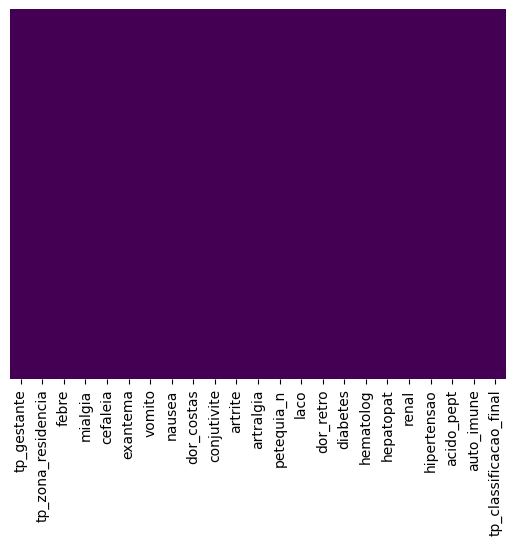

In [13]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
%matplotlib inline

In [15]:
df3['tp_classificacao_final'].value_counts()

tp_classificacao_final
10.0    40817
5.0     21817
13.0     6848
8.0      5436
Name: count, dtype: int64

In [16]:
x=df3.iloc[:,:-1]
y=df3.iloc[:,22]

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
Lreg=LogisticRegression()

In [28]:
Lreg.fit(xtrain,ytrain)

C:\Users\OBYDUL HAQUE EMON\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
Lreg.predict(xtest)

array([ 5., 10., 10., ..., 10., 10., 10.])

In [31]:
ytest

80624     5.0
17843    10.0
69744    13.0
9041     10.0
44608     5.0
         ... 
15821     8.0
58511    10.0
14610    10.0
79387    13.0
24239     8.0
Name: tp_classificacao_final, Length: 22476, dtype: float64

In [32]:
Lreg.score(xtest,ytest)

0.6005072076882008

In [33]:
Lreg.predict_proba(xtest)

array([[0.75969967, 0.06040381, 0.16508521, 0.01481131],
       [0.24572554, 0.09960008, 0.63890901, 0.01576537],
       [0.27411042, 0.01405553, 0.37742479, 0.33440926],
       ...,
       [0.24572554, 0.09960008, 0.63890901, 0.01576537],
       [0.23347856, 0.01924522, 0.38999484, 0.35728138],
       [0.19538781, 0.10665326, 0.68072695, 0.01723198]])